# 02 - Training the model

In the previous step of the tutorial we've worked on the dataset for our credit card defaulters model.
In this part of the tutorial we're going to train and test a machine learning model.

We'll cover the following topics:

* [Loading the training dataset](#loading-the-training-dataset)
* [Preparing the training dataset](#preparing-the-training-dataset)
* [Training the model](#training-the-model)
* [Validating model performance](#validating-model-performance)
* [Storing the model on disk](#storing-the-model-on-disk)

Let's get started by loading the training dataset.

## Loading the training dataset

In the previous step of the tutorial, we've created a training dataset. Let's load it back up for use during training.
We're using [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to perform this step.

In [2]:
import pandas as pd

Now that we've got the training set loaded, let's prepare it for training our model.

## Preparing the training dataset
In the previous section we've loaded our training dataset, let's prepare it for training our model.
The dataset contains quite a lot of columns/features based on which we can predict whether someone is going to default their next credit card payment:

* `LIMIT_BAL` - The credit card limit
* `SEX` - The gender (1 = Male, 2 = Female)
* `EDUCATION` - Education level (1 = Graduate school, 2 = University, 3 = high school, 4 = others)
* `MARRIAGE` - Marital status (1 = married, 2 = single, 3 = others)
* `AGE` - The age of the person
* `PAY_0` - Payment status September
* `PAY_2` - Payment status August
* `PAY_3` - Payment status July
* `PAY_4` - Payment status June
* `PAY_5` - Payment status May
* `PAY_6` - Payment status April
* `BILL_AMT1` - Amount due September
* `BILL_AMT2` - Amount due August
* `BILL_AMT3` - Amount due July
* `BILL_AMT4` - Amount due June
* `BILL_AMT5` - Amount due May
* `BILL_AMT6` - Amount due April
* `PAY_AMT1` - Amount paid September
* `PAY_AMT2` - Amount paid August
* `PAY_AMT3` - Amount paid July
* `PAY_AMT4` - Amount paid June
* `PAY_AMT5` - Amount paid May
* `PAY_AMT6` - Amount paid April

In addition to these input features, the dataset also contains the output that we want to predict: `default.payment.next.month`.

Let's use this information to create a dataset containing the inputs and another dataset containing the outputs that we want to train the model with.
Follow these steps to get both datasets:

* First, allocate the input features using `df_train[feature_names]` and assign the result to `x_train`.
* Next, allocate the targets using `df_train[target_name]` and assign the result to `y_train`.

In [9]:
feature_names = [
    'LIMIT_BAL',
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'AGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

target_name = 'default.payment.next.month'

Now that we have the input features and the expected output for the model. We can start to train the model.

## Training the model
In the previous section we've selected the inputs and the expected output for the model. Now let's take a look at training a model.
For the purposes of this tutorial, we'll select the model for you: `RandomForestClassifier`. 

The random forest classifier is is a classification model that uses a group of decision trees to classify a sample. Each individual tree predicts the outcome for the sample to a lower level of certainty. Then a majority vote mechanism is used to come up with a final prediction. The combination of this majority vote mechanism and the vast amount of decision trees results in a high level of accuracy for the model.

Follow these steps to set up the machine learning model:

* First, import the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (already done for you).
* Next, create a new instance using the following code: `classifier = RandomForestClassifier()`

In [15]:
from sklearn.ensemble import RandomForestClassifier

Now that you have a classifier instance, let's train it against our training dataset.
Follow these steps to train the model.

* Call [fit](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier.fit) method on the `classifier` instance to train the model.

RandomForestClassifier()

> Note: It will take a while for the model to train, depending on how much CPU power your computer has.

After the model is trained, we can use it to make predictions. But before we do that, let's first take a look at how well the model is doing.

## Validating model performance
In the previous section we've trained the model against our training set. The model hopefully learned a general pattern from the data to predict credit card defaulters for our new credit card company. To be sure it has learned the right thing, we're going to use a statistical validation technique.

We're going to take a look at two ways to validate model performance:

* First, we're going to take a look at the accuracy of the model.
* After that, we're going to plot a [Receiver Operator Characteristics Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) also known as ROC curve.

Let's start with the model accuracy. Follow these steps to measure the model's accuracy:

* First, load the test dataset using [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), use `../data/processed/test.csv` as the input filename. Assign the output to `df_test`.
* Next, extract the input features from the dataset using `df_test[feature_names]` and assign the results to `x_test`.
* After that, extract the targets from the test dataset using `df_test[target_name]` and assign the result to `y_test`.
* Finally, invoke `classifier.score(x_test, y_test)` to get the accuracy score for the model.


0.8193333333333334

The output for the `score` method should be around `0.8` which means we have an accuracy of roughly 80%.

Now that we have the accuracy metric, let's zoom in and take a look at false positives and false negatives. We want our model to separate the defaulters from the regular customers as well as machinely possible. To see if the model does that, we'll look at the ROC curve.

Follow these steps to plot the ROC curve for the model:

* First, import the [matplotlib](https://matplotlib.org/) library and the [plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html?highlight=plot_roc_curve#sklearn.metrics.plot_roc_curve) function (Already done for you).
* Then, call `plot_roc_curve(classifier, x_test, y_test)` to draw the ROC curve.
* Finally, call `plt.plot()` to show the graph in the notebook.

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

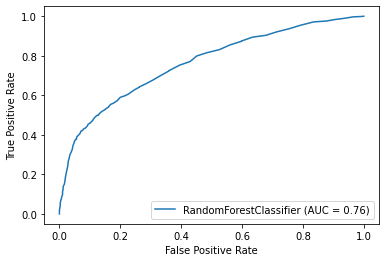

The ROC curve should be interpreted as follows:

* The ideal classifier has a line that goes up vertically to the top of the chart and horizontally to the right. 
  This means there are 100% true positives.
* A random classifier has 50% true positive and 50% false positive. Which results in a diagonal line.

The classifier that you've just trained roughly follows a curve between a diagonal line and a line with a square angle.
The closer you get to the ideal classifier line, the better your model will be in distinguishing between the two classes that
we predict.

Now that we've established what the performance is of our model, you can use the `predict` method to make a prediction.
You'll need to feed the predict method with one or more samples to get a prediction.

Let's save the model on disk and move on to the next part of the tutorial.

## Storing the model on disk
In the previous sections we've trained and tested a machine learning model. Let's save it on disk for reuse later.
Follow these steps to save the model:

* First, import [joblib]() a serialization library (Already done for you). 
* Next, call `joblib.dump(classifier, '../models/classifier.bin')` to save the model.

In [23]:
import joblib

['../models/classifier.bin']

Once you've saved a model using joblib, you can load it back into another python program using `joblib.load` and use it in, for example, a production environment. 

## Summary
In this part of the tutorial we've looked at training a random forest classifier to predict defaulters. We've also looked at validating model performance using two different approaches. In [the next part](./03-create-explainer.ipynb), we're going to look at using an explainer to investigate the behavior of the model. It will tell you more about why a certain outcome was predicted.
